##### 导入库

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from collections import Counter
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

##### 选择数据

In [ ]:
n='★阴性整合.csv'
p='★阳性整合.csv'
p='纯冰毒-重复.csv'
# p='纯海洛因-重复.csv'
# n='110正常人.csv'
# # n='0913-林职-阴性-55人.csv'
# p='纯冰毒.csv'
# n='1阴-66单条数据.csv'
# p='纯海洛因.csv'


##### 读取数据

In [ ]:

path='E:\\desktop\\data\\'
n_fea = pd.read_csv(path+'fea\\[特征]'+n,encoding="gbk")
p_fea = pd.read_csv(path+'fea\\[特征]'+p,encoding="gbk")


fea_list=[
  "maxvalue",
  "time2",
  "attr_\"abs\"__coeff_1",
  "attr_\"imag\"__coeff_3",
  "attr_\"real\"__coeff_2",
  "attr_\"stderr\"__chunk_len_50__f_agg_\"min\"",
  "attr_\"angle\"__coeff_6",
  "sdown",
  "attr_\"imag\"__coeff_6",
  "Rrange2",
  "attr_\"angle\"__coeff_3"
]

n_fea=n_fea[fea_list]
n_fea=shuffle(n_fea)
n_fea["tag"]=[0 for i in range(len(n_fea))]

p_fea=p_fea[fea_list]
p_fea=shuffle(p_fea)
p_fea["tag"]=[1 for i in range(len(p_fea))]



print(len(n_fea),len(p_fea))


##### 过采样

In [ ]:
#过采样
from imblearn.over_sampling import SVMSMOTE
svmsomte=SVMSMOTE(random_state=42)

np_fea=shuffle(pd.concat([n_fea,p_fea],axis=0))
x_data=np_fea[fea_list]
y_data=np_fea["tag"]

x_data,y_data=svmsomte.fit_resample(x_data,y_data)

#切分
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)
print(x_data.shape)

##### 搭建模型

In [ ]:
# 模型算法库
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#模型评估方法库
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
,classification_report,confusion_matrix

#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#导入模型存储和加载方法
from joblib import dump,load

#创建模型池
model_lst=[]

#实例化模型，然后添加到模型池内
#max_iter 最大迭代次数 ,class_weight='balanced'样本权重
logsistic=LogisticRegression(C=10,tol=1e-5,max_iter=200,l1_ratio=0,class_weight='balanced')
model_lst.append(('LogisticRegression',logsistic))

#max_depth最大树 max_features最大特征占比
dtc=DecisionTreeClassifier(max_depth=20,max_features=0.6,class_weight='balanced')
model_lst.append(('DecisionTreeClassifier',dtc))

#n_estimators决策树数量 
rfc=RandomForestClassifier(n_estimators=299,max_depth=20,max_features=0.5,class_weight='balanced')
model_lst.append(('RandomForestClassifier',rfc))

#learning_rate 学习速率 越大学的越快 但是不好 越小越精细
xgbc=XGBClassifier(max_depth=3,learning_rate=0.05,n_estimators=200,booster='gbtree')
model_lst.append(('XGBclassifier',xgbc))

gbdt=GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,tol=1e-5)
model_lst.append(('GradientBoostingClassifier',gbdt))

for mdl_name,mdl in model_lst:
    mdl.fit(x_train,y_train)
    y_pred=mdl.predict(x_test)

    #计算分类算法评估指标
    classification_report_=classification_report(y_true=y_test,y_pred=y_pred)
    print(mdl_name)
    print(classification_report_)

    #保存模型
    dump(mdl,mdl_name+".joblib")
    print("保存成功",mdl_name)
    #计算混淆矩阵
    confusion_matrix_=confusion_matrix(y_true=y_test,y_pred=y_pred)
    print(confusion_matrix_)

    sns.heatmap(confusion_matrix_,cmap=sns.color_palette("ch:2.5,-.2,dark=.3"),annot=True,fmt='.4g')

    plt.show()


##### 加载模型

LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        58
           1       0.81      0.89      0.85        44

    accuracy                           0.86       102
   macro avg       0.86      0.87      0.86       102
weighted avg       0.87      0.86      0.86       102

[[49  9]
 [ 5 39]]


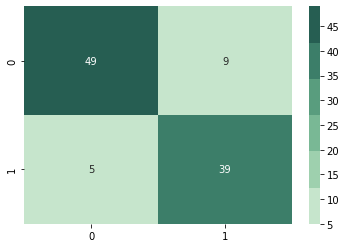

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.95      0.82      0.88        44

    accuracy                           0.90       102
   macro avg       0.91      0.89      0.90       102
weighted avg       0.91      0.90      0.90       102

[[56  2]
 [ 8 36]]


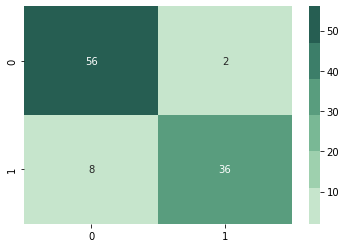

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.85      0.89      0.87        44

    accuracy                           0.88       102
   macro avg       0.88      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102

[[51  7]
 [ 5 39]]


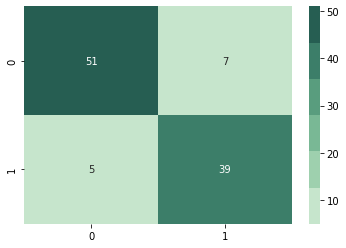

XGBclassifier
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.82      0.93      0.87        44

    accuracy                           0.88       102
   macro avg       0.88      0.89      0.88       102
weighted avg       0.89      0.88      0.88       102

[[49  9]
 [ 3 41]]


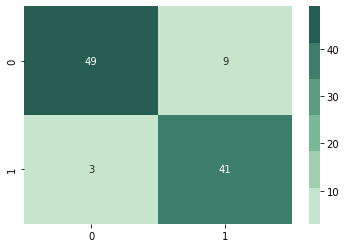

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.82      0.93      0.87        44

    accuracy                           0.88       102
   macro avg       0.88      0.89      0.88       102
weighted avg       0.89      0.88      0.88       102

[[49  9]
 [ 3 41]]


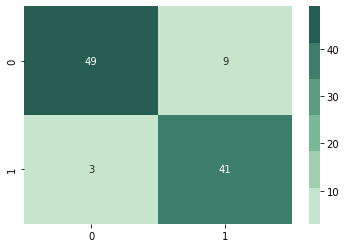

In [7]:
# 模型算法库
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#模型评估方法库
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
,classification_report,confusion_matrix

#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#导入模型存储和加载方法
from joblib import dump,load

#创建模型池
model_lst=[]

#实例化模型，然后添加到模型池内
#max_iter 最大迭代次数 ,class_weight='balanced'样本权重
logsistic=load('LogisticRegression.joblib')
model_lst.append(('LogisticRegression',logsistic))

#max_depth最大树 max_features最大特征占比
dtc=load('DecisionTreeClassifier.joblib')
model_lst.append(('DecisionTreeClassifier',dtc))

#n_estimators决策树数量 
rfc=load('RandomForestClassifier.joblib')
model_lst.append(('RandomForestClassifier',rfc))

#learning_rate 学习速率 越大学的越快 但是不好 越小越精细
xgbc=load('XGBclassifier.joblib')
model_lst.append(('XGBclassifier',xgbc))

gbdt=load('GradientBoostingClassifier.joblib')
model_lst.append(('GradientBoostingClassifier',gbdt))

for mdl_name,mdl in model_lst:
    y_pred=mdl.predict(x_test)

    #计算分类算法评估指标
    classification_report_=classification_report(y_true=y_test,y_pred=y_pred)
    print(mdl_name)
    print(classification_report_)

    #计算混淆矩阵
    confusion_matrix_=confusion_matrix(y_true=y_test,y_pred=y_pred)
    print(confusion_matrix_)

    sns.heatmap(confusion_matrix_,cmap=sns.color_palette("ch:2.5,-.2,dark=.3"),annot=True,fmt='.4g')

    plt.show()
